IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Tarea 01 – Cargando y Analizando Datos

- **Fecha de Entrega:** martes 26 de agosto de 2025, a las 23:59.
- 
**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en l emódulo de Tara 01 habilitado en Canvas.




## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, tendremos como objetivo comprender cómo han cambiado los juegos de mesa en los últimos 40 años. Específicamente queremos saber qué tipos de juegos se han vuelto más comunes hoy en día y qué los caracteriza.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

Estaremos utilizando información extraída desde [BoardGameGeek.com](https://boardgamegeek.com/), una plataforma para aficionados de los juegos de mesa, que permite a sus usuarios registrar, calificar e intercambiar sus juegos favoritos. Actualmente, BGG es una de las bases de datos más extensa y diversa de juegos de mesa.

El dataset con el que trabajaremos consiste en un grupo de archivos CSV que contienen información sobre más de 100.000 juegos de mesa almacenados en la plataforma. Este puede descargarse directamente desde el siguiente enlace: https://www.kaggle.com/datasets/mshepherd/board-games Para descargar los datos, haga click en el botón de **Download**, donde podrá descargar los archivos como `.zip`, o bien utilizar la API de Kaggle.

Para el desarrollo de esta tarea, solo utilizaremos los archivos con el prefijo `bgg_`.

**Si utiliza la API de Kaggle para descargar los datos, deje el código utilizado en la siguiente celda:**

In [1]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files("mshepherd/board-games", path="C:\\Users\\isimo\\Downloads\\ciencia de datos\\imt2200-25s2\\tareas\\tarea 01", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/mshepherd/board-games


### 2.1 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 DataFrame unificado (1 punto)

Vamos a cargar en un DataFrame los datos de juegos guardados en el documento `bgg_GameItem.csv`. Al inspeccionar nuestros datos, podemos notar que los valores de ciertas comunas vienen "codificados" con ID. Para comenzar, vamos a juntar la información de los distintos archivos descargados.

**a) (0.8 pts)** Genere un DataFrame único con toda la información de cada juego, incluyendo: nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial. Guarde este DataFrame en un nuevo archivo CSV.

In [ ]:
gameitem = pd.read_csv("bgg_GameItem.csv")

#Se leen los archivos que contienen lo necesario para la decodificacion
artista_disenador = pd.read_csv("bgg_Person.csv")
mecanicas = pd.read_csv("bgg_Mechanic.csv")
categorias = pd.read_csv("bgg_Category.csv")
tipo_juego = pd.read_csv("bgg_GameType.csv")
familia_juego = pd.read_csv("bgg_GameFamily.csv")
editorial_juego = pd.read_csv("bgg_Publisher.csv")

#La siguiente funcion se hizo para agilizar el proceso de la decodificacion de la base de datos,
# para evitar errores por distintos tipos de datos (int64, str), se leen las columnas como un solo 
# tipo de dato (str) con el comando .astype. Se hace un cruce y reemplazamiento de las bases de 
# datos de codificacion con las del dataframe principal, para esto se utilizara el metodo merge(),
# luego se intercambiara la informacion de las columnas "agregadas" con las columnas principales,
# para finalmente borrar las columnas agregadas al final (bgg_id y name_suffix)
#Para evitar el error al borrar la columna nombre, se utiliza en cada caso un sufijo (suffix) 
def decodificador(main, ref, columna_main, columna_id="bgg_id", columna_nom="name"):
    main[columna_main] = main[columna_main].astype(str)
    ref[columna_id] = ref[columna_id].astype(str)
    columnas_orginales = set(main.columns)
    dataframe = main.merge(ref, left_on=columna_main, right_on=columna_id, how="left", 
                           suffixes=("", f"_{columna_main}"))
    dataframe[columna_main] = dataframe[columna_nom]
    #Consulta a ChatGPT: "Estoy creando una funcion en python con Pandas para reemplazar/decodificar
    # una columna de un dataframe principal (main) con los valores de otro dataframe (ref). Estoy 
    # utilizando merge(). Copiare la funcion hasta el momento a continuacion, aun asi la explico: ya 
    # logro reemplazar los valores, pero quiero que la funcion elimine automaticamente todas las 
    # columnas extras generadas (nombres con suffix, y los _id), logrando asi que el dataframe final 
    # solo conserve la columna original decodificada y el resto de columnas originales. ¿Como puedo 
    # escribir la funcion para evitar las columnas extras innecesarias?" La respuesta de ChatGPT 
    # incluye columnas_originales, y lo que sigue abajo en este codigo (exceptuando el return):
    columnas_a_eliminar = [columna_id, columna_nom, f"{columna_id}_{columna_main}", 
                           f"{columna_nom}_{columna_main}"]
    columnas_a_eliminar = [c for c in columnas_a_eliminar if c in dataframe.columns]
    dataframe.drop(columns=columnas_a_eliminar, inplace=True)
    return dataframe

#Se llama a la funcion para cada archivo codificado .csv
gameitem = decodificador(gameitem, artista_disenador, "designer")
gameitem = decodificador(gameitem, artista_disenador, "artist")
gameitem = decodificador(gameitem, mecanicas, "mechanic")
gameitem = decodificador(gameitem, categorias, "category")
gameitem = decodificador(gameitem, tipo_juego, "game_type")
gameitem = decodificador(gameitem, familia_juego, "family")
gameitem = decodificador(gameitem, editorial_juego, "publisher")

#Este nuevo archivo decodificado se guarda en un nuevo archivo .csv
columnas_decodificadas = ["game_type", "mechanic", "artist", "designer", "family", "publisher", "category"]
archivo = gameitem[columnas_decodificadas]
archivo.to_csv("data_frame_decodificado.csv", index=False)

#Se muestran los primeros 5 items para una mejor visualizacion 
df = pd.read_csv("data_frame_decodificado.csv")
df.head(5)

,game_type,mechanic,artist,designer,family,publisher,category
0,Strategy Game,NaN,NaN,Die Macher,NaN,NaN,NaN
1,Strategy Game,Trick-taking,Bob Pepper,Dragonmaster,NaN,NaN,NaN
2,Strategy Game,NaN,Franz Vohwinkel,Samurai,NaN,NaN,NaN
3,Strategy Game,NaN,Thomas di Paolo,Tal der Könige,NaN,KOSMOS,Ancient
4,Strategy Game,NaN,NaN,Acquire,NaN,NaN,NaN


**b) (0.2 pts)** ¿Cuánto espacio en disco ocupa este DataFrame? ¿Cuánto espacio en disco ocupan los documentos CSV separados? ¿A qué se debe esta diferencia? Comente.



El dataframe data_frame_decodificado ocupa 6.855KB. Luego, los archivos .csv separados ocupan,

- GameItem: 15.701KB
- Category: 2KB
- GameFamily: 166KB
- GameType: 1KB
- Mechanic: 5KB
- Person: 1.135KB
- Publisher: 583KB

Esto ocurre porque, en el caso de GameItem, esta base de datos contenía toda la información unificada, incluso con la codificación. En cambio, los otros archivos .csv solo contenían la decodificación efectiva para algunas de las columnas de bbg_GameItem.csv. Podemos notar, si entramos a los archivos, que mientras menos contenido tienen, menos KB ocupan. Esto ocurre porque se tiene una relación directa de más datos -> más espacio ocupado en el disco duro. Por esta razón, mi archivo creado data_frame_decodificado.csv ocupa más espacio que los archivos decodificadores, pero menos espacio que bbg_GameItem.csv, puesto que solo utilicé las siete columnas decodificadas de interés para su creación, en vez de las totales de GameItem.

### 3.2 Juegos publicados anualmente (1.5 puntos)


**a) (0.5 pts)** Limpie los datos para dejar solo aquellos que tienen valores válidos de año de publicación. Luego responda: ¿cuál es el rango de años con el que estamos trabajando? ¿Tienen sentido estos años?


In [90]:
#Para limpiar los datos, se concretaran dos pasos:
# 1. Se eliminaran todas las filas sin ningún dato en la columna "year".
# 2. Se filtraran los datos en el rango [-3600, 2025] (para el contexto, dirigase al archivo README seccion 3.2).

gameitem = pd.read_csv("bgg_GameItem.csv")

gameitem = gameitem[gameitem["year"].notnull()]
gameitem = gameitem[gameitem["year"] >= -3600.0]
gameitem = gameitem[gameitem["year"] <= 2025.0]

#A pesar de que el ejercicio no lo pide, decidi crear un archivo para ver que todo este correcto
gameitem.to_csv("years_validos.csv", index=False)
#De forma interna, al ver que el archivo creado pesa 16.749KB en contraste a los 18.295KB de GameItem, queda
# claro que hubo una limpieza de algunos datos invalidos.

#Para el rango, utilizamos numpy con su funcion Peak to peak
year_variable = gameitem["year"].to_numpy()
rango = np.ptp(year_variable)
print(rango)

5525.0


El rango de los años trabajados es 5525. La pregunta de si tiene sentido depende mucho de como se tome; tiene sentido porque, habiendo buscado los datos históricos, efectivamente el primer juego de mesa (descubierto hasta ahora) de la historia es Senet, que data de ~5000 años, donde se creó el primer juego de mesa, y en el código nos aseguramos que no pasara del año actual 2025. 

Ahora, si abordamos la pregunta consultando, "¿para qué tienen sentido los años?", cambia, pues dependería netamente de lo que se quiere responder el si tienen sentido, o si se debería acortar el rango en ciertos años. En resumen, dentro del contexto histórico, sí, tanto los datos como el rango tienen lógica.

**b) (0.5 pts)** Seleccione solamente los juegos entre los años 1980 y 2025. Luego grafique la cantidad de juegos publicados por año. ¿Cómo es esta tendencia? Comente.

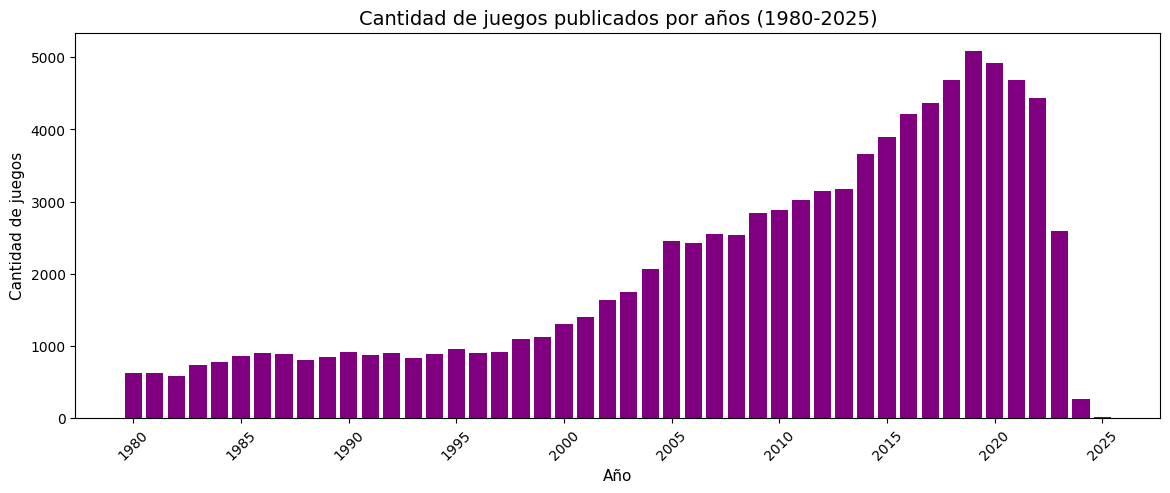

In [91]:
#Primero, se recorta el rango al pedido. Luego, se agrupan los juegos por año con la
# función groupby() y se cuenta la cantidad de juegos publicados por año. Los datos 
# se ordenan cronologicamente, así finalmente se crea el gráfico con matplotlib.
#El grafico toma como referencia algunos recursos vistos en la actividad 1.
acorte_rango = pd.read_csv("years_validos.csv")

juegos_en_rango = acorte_rango[acorte_rango["year"] >= 1980.0]
juegos_en_rango = juegos_en_rango[juegos_en_rango["year"] <= 2025.0]

juegos_cantidad = juegos_en_rango.groupby("year")
juegos_por_year = juegos_cantidad["year"].count()
juegos_por_year = juegos_por_year.sort_index()

plt.figure(figsize=(14,5))
plt.bar(juegos_por_year.index, juegos_por_year.values, color="purple")
plt.title("Cantidad de juegos publicados por años (1980-2025)", fontsize=14, color="k")
plt.xlabel("Año", fontsize=11)
plt.ylabel("Cantidad de juegos", fontsize=11)
plt.xticks(juegos_por_year.index[::5], rotation=45)
plt.show()

La tendencia, entre 1800 y los 2000, parecía ser estable, no sobrepasando en cantidad los 1000 publicados por año. En el 2000, comienza a subir gradualmente hasta alcanzar su máximo en 2019, para luego bajar progresivamente hasta el año 2023, y tener una caída considerable en 2024 (~2500 en 2023, a menos de 500 en 2024). Esto, sin embargo, puede deberse a que, al ser juegos más actuales, aún no los suben a la base de datos; sin embargo, para una respuesta concreta, habría que hacer un análisis más profundo tomando en consideración la cultura, la economía, y otros factores que puedan afectar la publicación de juegos.

**c) (0.5 pts)** ¿Entre qué años hubo un mayor aumento de publicación de juegos de mesa según los registros de BGG?

In [95]:
#Tomaremos nuevamente el archivo de años_validos para esta pregunta
datos_considerados = pd.read_csv("years_validos.csv")

recorte_info = datos_considerados.groupby("year")
recorte_info = recorte_info["year"].count()
recorte_info = recorte_info.sort_index()

print(recorte_info)


year
-3500.0       1
-3000.0       4
-2600.0       2
-2200.0       1
-2000.0       2
           ... 
 2021.0    4693
 2022.0    4436
 2023.0    2597
 2024.0     261
 2025.0      16
Name: year, Length: 333, dtype: int64


### 3.3 Análisis de duración y complejidad (1.5 puntos)

Si bien hay muchas posibles características que podemos explorar para los juegos de mesa, esta vez nos centraremos en el tiempo de juego y la complejidad. En esta sección queremos comprender si se ha modificado notablemente la duración promedio y la percepción de complejidad de los juegos de mesa a través de los años.

**a) (0.3 pts)** Inspecciones y filtre los datos que tengan valores válidos para: tiempo mínimo de juego, tiempo máximo de juego y complejidad. En el caso de que existan "outliers", puede descartarlos, cosiderando un rango razonable para las variables anteriores. Justifique su desición.

**b) (0.2 pts)** Veremos ahora si ha cambiado la duración promedio de los juegos de mesa en nuestro rango de años seleccionado. Primero, cree una nueva columna `avg_time` en el dataset con la duración promedio supuesta para cada juego.

**c) (0.5 pts)** Grafique la duración promedio de juegos al año entre 1980 y 2025. ¿Existe alguna tendencia? Asegúrese de colocar las unidades correspondientes en sus ejes si es necesario. Comente sus resultados.

**d) (0.5 pts)** Nos interesa saber si los juegos de mesa recientes son más complejos que aquellos publicados antes de los 2000. BoardGameGeek permite evaluar la complejidad (o "weight") de un juego en una escala de 1 a 5, siendo 1 un juego "liviano" o fácil de entender, y 5 un juego "pesado" o complejo. Primero, seleccione los juegos que han sido evaluados por al menos 100 usuarios. Luego grafique la complejidad promedio de los juegos según año. Responda: ¿ha cambiado la percepción de complejidad entre juegos entre 1980 y la actualidad?

### 3.4 Análisis de categorías comunes (2 puntos)

Existe una gran diversidad de categorías de juegos de mesa. Ahora nos concentraremos en un grupo específico de ellas, con el fin de analizar cómo a cambiado la cantidad de juegos de estas clases desde 1980 hasta hoy.

**a) (0.7 pts)** ¿Cuáles son las 5 categorías más comunes en los juegos del dataset? Muestre la cantidad de juegos que hay de cada una. Puede graficar estos valores, o bien, entregar un DataFrame con sus valores.

**b) (0.3 pts)** Para cada una de estas 5 categorías, cree un DataFrame que contenga la cantidad de juegos en el dataset según año. Luego junte estos DataFrames en uno solo con los atributos de "Año", "Categoría" y "Cantidad".

**c) (1 pto)** Grafique, en un solo gráfico y con distintos colores, la cantidad de juegos por año según categoría. Preocúpese de ponerle etiquetas al gráfico para identificar cada categoría y una leyenda donde se muestre cada una. Comente: ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?


### 3.5 Análisis Crítico (Bono +0.5 puntos)

¿Qué limitaciones o problemas encontraste en los datos?